# PML Test (Hugonin 2005)

This test illustrates the usage of the complex coordinate transform. This is useful when dealing with structure in which a high portion of the power is scattered away. 

This test is based on the paper "Perfectly matched layers as nonlinear coordinate
transforms: a generalized formalization" by Jean Paul Hugonin and Philippe Lalanne (J. Opt. Soc. Am. A / Vol. 22, No. 9 / September 2005).

## Summary
The example will compute the reflection and transmission from 2 dent in a 1D waveguide. 

The following example will:
 1. Import all necessary modules
 2. Define the layers involved
 3. Combine them into a structure
 4. Calculate transmission and reflection
 5. Sweep over truncation order
 
 
### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import A_FMM

### Define layers involved

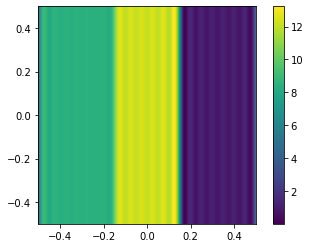

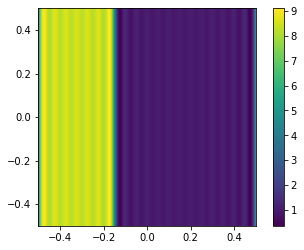

In [2]:
ax = 1.0
lam = 0.975
k0 = ax/lam

s = 0.3
d = 0.15

n_core = 3.5
n_clad = 2.9
n_air = 1.0

Nx = 20
Ny = 0

cr = A_FMM.Creator()
cr.slab(n_core**2.0, n_clad**2.0, n_air**2.0, s/ax)
wave = A_FMM.Layer(Nx,0,cr)
cr.slab(n_air**2.0, n_clad**2.0, n_air**2.0, s/ax)
gap=A_FMM.Layer(Nx,0,cr)   

wave.eps_plot()
gap.eps_plot()



### Define stack structure

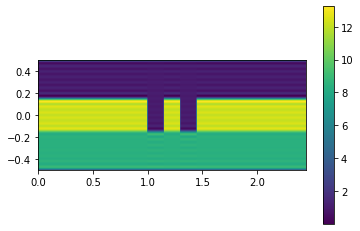

In [3]:
mat = [wave, gap, wave, gap, wave]
dl = [x/ax for x in [1.0,d,d,d,1.0]]
st = A_FMM.Stack(mat, dl)
st.count_interface()
st.transform(0.7, complex_transform=True)

st.plot_stack()

### Solve structure and calculate reflection


In [4]:
st.solve(ax/lam)
print('TE Reflection:{}'.format(st.get_R(0,0)))
print('TM Reflection:{}'.format(st.get_R(1,1)))

TE Reflection:0.3930907212996877
TM Reflection:0.3551824219323141


## Field Plotting
### Plotting field under TE illumination

([array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]),
  array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        

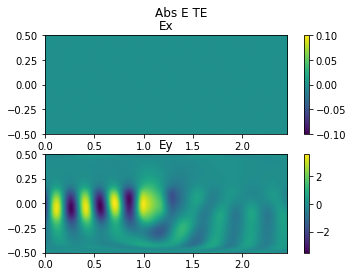

In [5]:
st.plot_E(i=0,title='Abs E TE')

([array([ 2.71142961e-02-1.04959633e-01j,  2.20538395e-02-7.54075379e-02j,
         -8.08219850e-03-3.38848414e-02j, -6.35012209e-02-4.29241447e-04j,
         -1.29539041e-01+1.59260256e-02j, -1.94207232e-01+2.22311812e-02j,
         -2.53782179e-01+3.02462669e-02j, -3.04796328e-01+4.40921604e-02j,
         -3.40052017e-01+5.98912285e-02j, -3.56773208e-01+7.39568588e-02j,
         -3.63637982e-01+8.72711316e-02j, -3.73229480e-01+1.01782097e-01j,
         -3.88043578e-01+1.15731801e-01j, -3.99344462e-01+1.25228874e-01j,
         -4.01162496e-01+1.29433176e-01j, -4.00092295e-01+1.31638685e-01j,
         -4.06857995e-01+1.34727043e-01j, -4.21475557e-01+1.37385018e-01j,
         -4.33553351e-01+1.36052986e-01j, -4.37970039e-01+1.29490699e-01j,
         -4.43505851e-01+1.19715484e-01j, -4.61140536e-01+1.08649989e-01j,
         -4.88128794e-01+9.55463266e-02j, -5.11574488e-01+7.83236044e-02j,
         -5.28046410e-01+5.61547047e-02j, -5.51109884e-01+2.96769559e-02j,
         -5.93527394e-01-

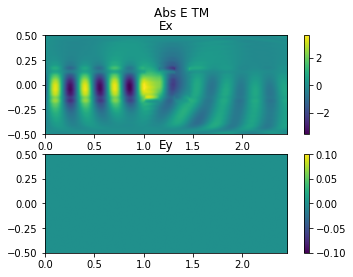

In [6]:
st.plot_E(i=1,title='Abs E TM')

<A_FMM.layer.Layer object at 0x7f0419e3a350> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
<A_FMM.layer.Layer object at 0x7f0419e3a380> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
<A_FMM.layer.Layer object at 0x7f0419e3a350> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


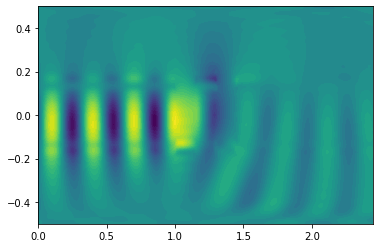

In [7]:
x, y, z = np.linspace(-0.5, 0.5, 100), [0.0], np.linspace(0.0, 2.5, 251)
u = wave.create_input({0:1.0, 1:1.0})
field = st.calculate_fields(x,y,z, u, np.zeros_like(u))
plt.contourf(np.squeeze(field['z']), np.squeeze(field['x']), np.squeeze(field['Ey']), levels=41)
plt.contourf(np.squeeze(field['z']), np.squeeze(field['x']), np.squeeze(field['Ex']), levels=41)

## Sweep over truncation order

In [8]:
def calc(Nx):
    cr.slab(n_core**2.0, n_clad**2.0, n_air**2.0, s/ax)
    wave = A_FMM.Layer(Nx,0,cr)
    cr.slab(n_air**2.0, n_clad**2.0, n_air**2.0, s/ax)
    gap=A_FMM.Layer(Nx,0,cr)   
    mat = [wave, gap, wave, gap, wave]
    dl = [x/ax for x in [1.0,d,d,d,1.0]]
    st = A_FMM.Stack(mat, dl)
    st.count_interface()
    st.transform_complex(0.7)
    st.solve(ax/lam)
    return st.get_R(0,0), st.get_R(1,1)

In [9]:
NX = [10,20,30,40,50,60,70,80,100]
RR = [calc(Nx) for Nx in NX]
Data = pd.DataFrame(RR, index=NX, columns=['TE', 'TM'])

AttributeError: 'Stack' object has no attribute 'transform_complex'

Text(0, 0.5, '$|R-R_0|$')

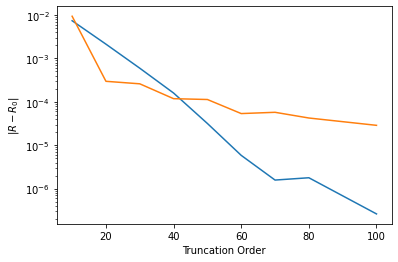

In [ ]:
plt.plot(NX, abs(Data['TE']-0.3952113445))
plt.plot(NX, abs(Data['TM']-0.3554787))
plt.yscale('log')
plt.xlabel('Truncation Order')
plt.ylabel(r'$|R-R_0|$')